# GRU

In [1]:
import tensorflow as tf
import numpy as np
import io
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True, shuffle_files=True)

In [3]:
train_data, test_data = imdb["train"], imdb["test"]

In [4]:
training_sentences, training_labels = [], []
testing_sentences, testing_labels = [], []

for string, label in train_data:
    training_sentences.append(str(string.numpy()))
    training_labels.append(str(label.numpy()))

for string, label in test_data:
    testing_sentences.append(str(string.numpy()))
    testing_labels.append(str(label.numpy()))

training_labels = np.array(training_labels).astype("int")
testing_labels = np.array(testing_labels).astype("int")

In [5]:
vocab_size = 10000
embedding_dim = 16 
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)


In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

b'the main complaint with this film is the fact that i can not tell who is who no racism intended but these <OOV> look all the same i can tell somewhat of the story but heck thats about as far as it goes the peoples identities are not a mystery if they were a mystery i would care about them instead i wasn 't them off the screen <OOV> br br tons of wide shots and silent <OOV> faces <OOV> this movie heck is it boring not only do i not know these people but they are just sitting there br br the production is typical chinese john woo terrible video with <OOV> scenes this looks only slightly better than
b'The main complaint with this film is the fact that I CAN NOT tell who is who. No racism intended, but these Asians look all the same! I can tell somewhat of the story, but heck thats about as far as it goes. The peoples identities are not a mystery, if they were a mystery I would care about them. Instead I wasn\'t them off the screen ASAP.<br /><br />Tons of wide shots and silent emotionle

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [8]:
num_epochs = 50
history = model.fit(padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/50
25000/25000 [==============================] - 23s 928us/sample - loss: 0.5457 - accuracy: 0.6918 - val_loss: 0.3810 - val_accuracy: 0.8324
Epoch 2/50
25000/25000 [==============================] - 17s 667us/sample - loss: 0.3124 - accuracy: 0.8709 - val_loss: 0.3562 - val_accuracy: 0.8406
Epoch 3/50
25000/25000 [==============================] - 17s 665us/sample - loss: 0.2497 - accuracy: 0.9030 - val_loss: 0.3791 - val_accuracy: 0.8357
Epoch 4/50
25000/25000 [==============================] - 16s 642us/sample - loss: 0.2066 - accuracy: 0.9240 - val_loss: 0.4518 - val_accuracy: 0.8288
Epoch 5/50
25000/25000 [==============================] - 17s 675us/sample - loss: 0.1624 - accuracy: 0.9442 - val_loss: 0.4645 - val_accuracy: 0.8276
Epoch 6/50
25000/25000 [==============================] - 18s 706us/sample - loss: 0.1192 - accuracy: 0.9606 - val_loss: 0.5847 - val_accuracy: 0.8173
Epoch 7/50
25000/25000 [====================

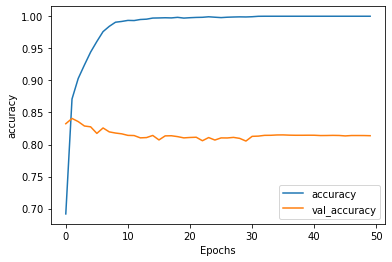

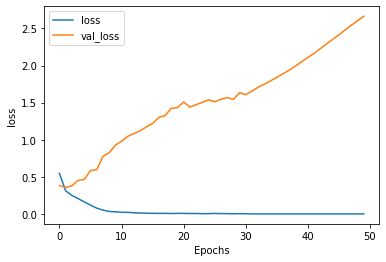

In [9]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", 'val_accuracy'])

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss", 'val_loss'])